In [15]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utility

reload(utility)
from utility import *

from scipy.optimize import curve_fit
from SecondaryValue import SecondaryValue
import pandas as pd

In [16]:
area = 26  # cm^2
int_ein = 100e-3/3 # w/cm^2

In [17]:
ccurves = load_and_analyze([
        ('a', '3x3_hell', 6),
        # ('b_1', '3x3_schaltung_1', 6),
        ('b_2', '3x3_schaltung_2', 6),
        ('b_31', '3x3_schaltung_3', 6),
        ('b_41', '3x3_schaltung_4', 6),
        ('c_1', '3x3_verschattung_1', 6),
        ('c_2', '3x3_verschattung_2', 6),
        ('c_3', '3x3_verschattung_3', 6),
        ('d_1', 'huge_hell', 13),
        ('d_2', 'huge_verbraucher', 13)],
        int_ein,
        area=area,
        formatter='../messungen/191114_OM_VB/3_{}.dat'.format,
        columns=['desc', 'curve', 'area', 'j_c', 'u_cc', 'ff', 'eta', 'p_mlp', 'u_mlp', 'i_mlp'])


In [18]:
ccurves['eta']*100

3x3_hell              10.255106
3x3_schaltung_2        3.232008
3x3_schaltung_3        0.002270
3x3_schaltung_4        1.125927
3x3_verschattung_1     0.089359
3x3_verschattung_2     5.338654
3x3_verschattung_3     0.353334
huge_hell              7.816337
huge_verbraucher       3.641795
Name: eta, dtype: float64

3x3_hell 0.6245592293371117


3x3_schaltung_2 3.9739599014265616
3x3_schaltung_3 4931.589315361373


3x3_schaltung_4 8.664709675467378


3x3_verschattung_1 0.8625916754957227
3x3_verschattung_2 0.6626737582881355
3x3_verschattung_3 0.8200366083399457


huge_hell 5.476550562755263
huge_verbraucher 3.959582958538259


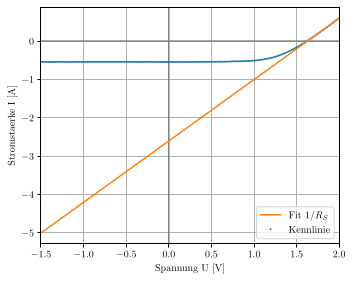

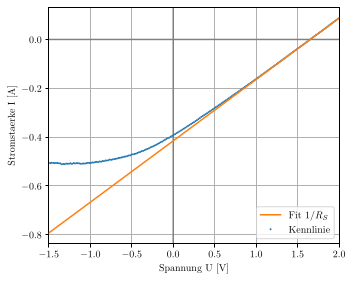

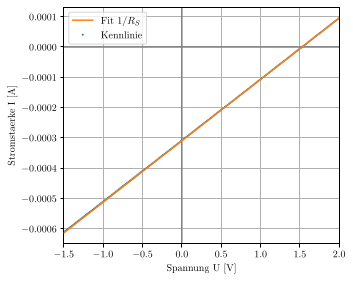

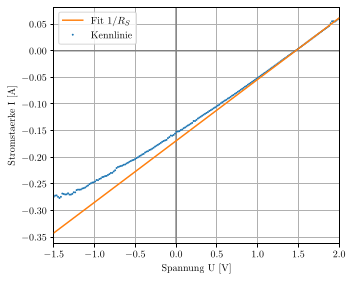

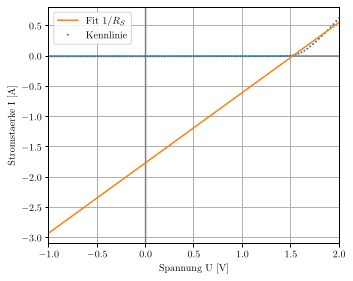

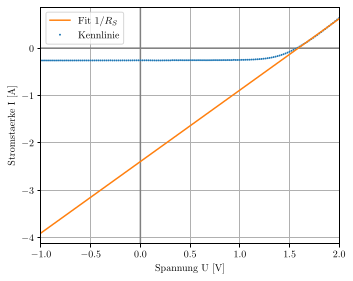

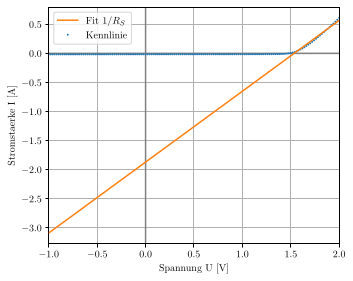

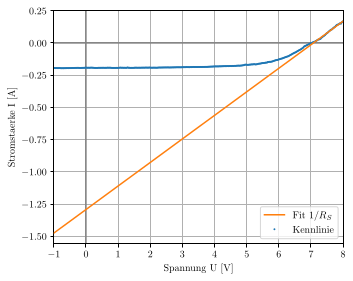

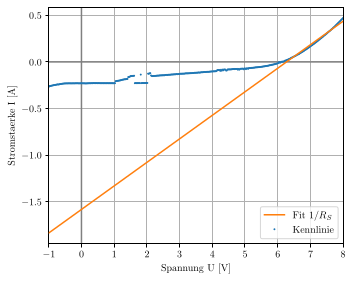

In [19]:
def lin(x, a, b):
    return a*x + b
rs = dict()
for _, curve in ccurves.iterrows():
    c = curve['curve']
    cg = c[c[:,1] > 0]
    popt, pcov = curve_fit(lin, *cg.T)
    f, a = plot_ccurve(c, label='Kennlinie')
    a.plot(c[:,0], lin(c[:,0], *popt), zorder=1000, label='Fit $1/R_S$')
    a.legend()
    save_fig(f, curve['desc']  + '_rs.pgf')
    rs[curve['desc']] = 1/popt[0]
    print(curve['desc'], 1/popt[0])
    

In [20]:
ccurves.loc['3x3_hell']['aht']

KeyError: 'aht'

3x3_hell 4829.672875332989
3x3_schaltung_2 12.260149943835113


3x3_schaltung_3 27.32225131778705


3x3_schaltung_4 3.4871621315913117
3x3_verschattung_1 781.1210886930061
3x3_verschattung_2 500.4631310673579


3x3_verschattung_3 1079.1258349574764


huge_hell 430.64220644999955
huge_verbraucher 23.011077088185388


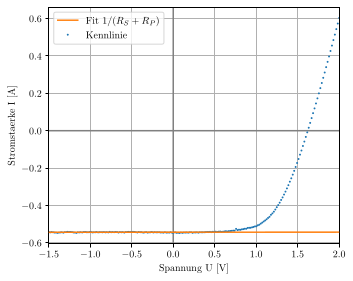

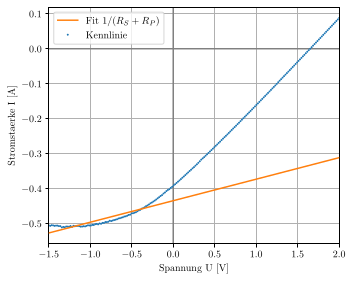

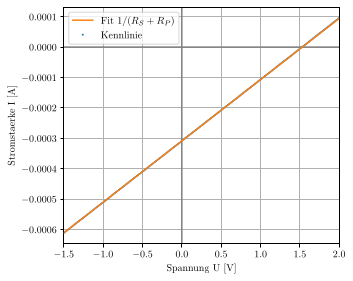

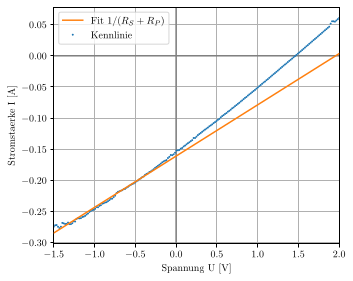

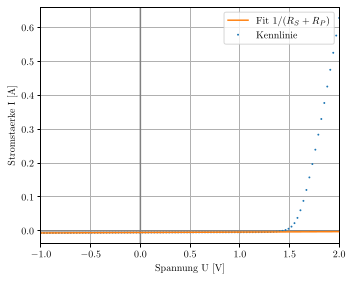

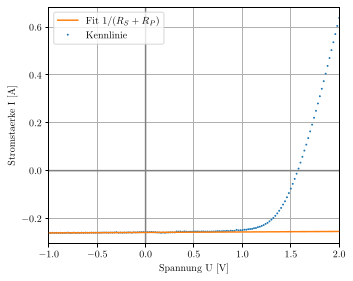

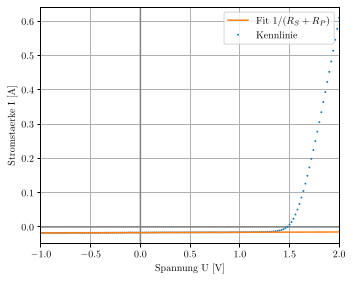

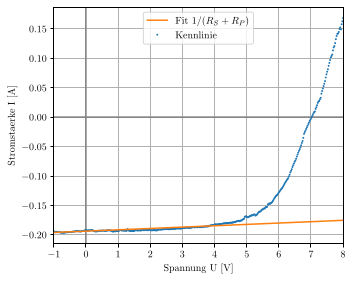

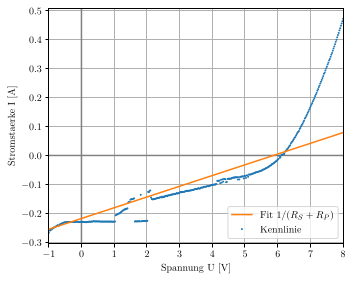

In [21]:
for _, curve in ccurves.iterrows():
    c = curve['curve']
    cg = c[c[:,0] < -.1]
    popt, pcov = curve_fit(lin, *cg.T)
    f, a = plot_ccurve(c, label='Kennlinie')
    a.plot(c[:,0], lin(c[:,0], *popt), zorder=1000, label='Fit $1/(R_S+R_P)$')
    a.legend()
    save_fig(f, curve['desc']  + '_rsrp.pgf')

    print(curve['desc'],1/popt[0]-rs[curve['desc']])

# Plot all ccurves

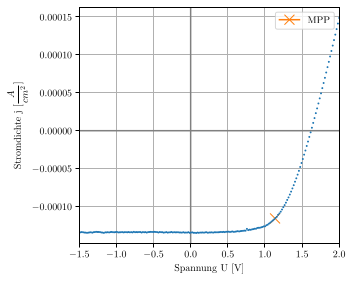

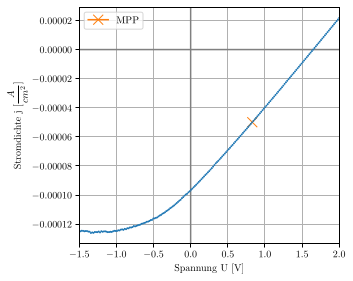

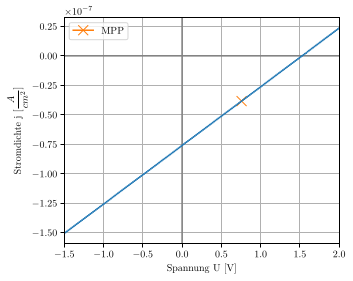

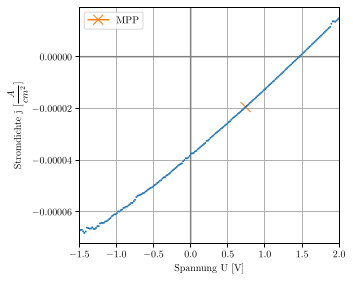

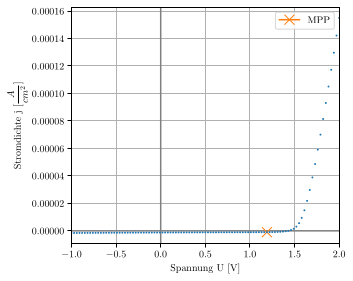

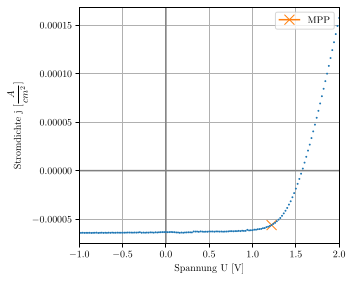

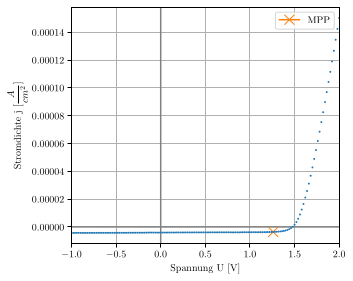

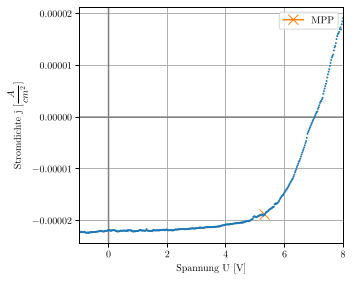

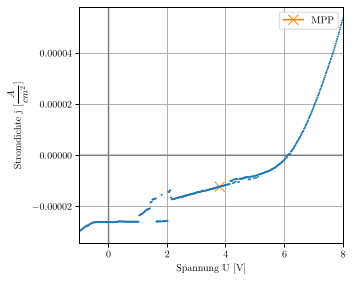

In [22]:
for _, curve in ccurves.iterrows():
    plot_ccurve(curve['curve'], area=area * curve['area'],
    save=f'C/{curve["desc"]}.pgf', mlp=[curve['u_mlp'], curve['i_mlp']])

In [23]:
ccurves.loc['huge_hell']

desc                                             huge_hell
curve    [[-1.0, -0.1947314], [-0.9775, -0.1942969], [-...
area                                                   338
j_c                                            0.000567871
u_cc                                               7.02243
ff                                                0.653348
eta                                              0.0781634
p_mlp                                             0.880641
u_mlp                                               5.3225
i_mlp                                  -0.1654561994540209
Name: huge_hell, dtype: object

In [24]:
ccurves['j_c']=ccurves['j_c']*1000

In [25]:
print(ccurves[['desc', 'j_c', 'u_cc', 'ff', 'eta']].round({'j_c': 6, 'u_cc': 2, 'ff': 2, 'eta': 6}).to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
               desc &       j\_c &  u\_cc &    ff &       eta \\
\midrule
           3x3\_hell &  3.495189 &  1.62 &  0.60 &  0.102551 \\
    3x3\_schaltung\_2 &  2.513409 &  1.65 &  0.26 &  0.032320 \\
    3x3\_schaltung\_3 &  0.001977 &  1.53 &  0.25 &  0.000023 \\
    3x3\_schaltung\_4 &  0.981105 &  1.46 &  0.26 &  0.011259 \\
 3x3\_verschattung\_1 &  0.031919 &  1.43 &  0.65 &  0.000894 \\
 3x3\_verschattung\_2 &  1.645931 &  1.57 &  0.69 &  0.053387 \\
 3x3\_verschattung\_3 &  0.105492 &  1.48 &  0.76 &  0.003533 \\
          huge\_hell &  0.567871 &  7.02 &  0.65 &  0.078163 \\
   huge\_verbraucher &  0.678768 &  6.11 &  0.29 &  0.036418 \\
\bottomrule
\end{tabular}



In [26]:
.to_latex(index=False))

SyntaxError: invalid syntax (<ipython-input-26-19e7cfc43eeb>, line 1)

In [27]:
ccurves['p_mlp']

3x3_hell              0.533266
3x3_schaltung_2       0.168064
3x3_schaltung_3       0.000118
3x3_schaltung_4       0.058548
3x3_verschattung_1    0.004647
3x3_verschattung_2    0.277610
3x3_verschattung_3    0.018373
huge_hell             0.880641
huge_verbraucher      0.410309
Name: p_mlp, dtype: float64